In [2]:
from M1M3tools import *
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
import glob
import pandas as pd

%matplotlib inline
plt.jet()

import scipy.io

<Figure size 432x288 with 0 Axes>

In [10]:
# available in mat: 'Udn3norm','Vdn3norm','Gdn','x','y','dnx','dny','dnz'
mat = scipy.io.loadmat('data/myUdn3norm_156.mat')
Udn3norm = mat['Udn3norm']
Vdn3norm = mat['Vdn3norm']
bx = mat['x']
by = mat['y']
nodeID = mat['annulus']
X = np.loadtxt('data/LSST_BM_XTalk.txt')

### We want to keep our mode shapes orthonormal, so we keep shapes unchanged, and scale the forces


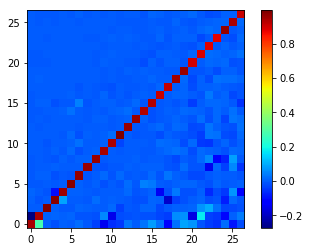

In [4]:
plt.imshow(X, origin='lower')
plt.colorbar()

What the cross talk matrix means, is, mathematically,

$
\left[ \begin{array}{c} m1  \\ m2 \\ \vdots \\ m27 \end{array} \right]
= X^T
\left[ \begin{array}{c} U1  \\ U2 \\ \vdots \\ U27 \end{array} \right]
= X^T G
\left[ \begin{array}{c} V1  \\ V2 \\ \vdots \\ V27 \end{array} \right]
$

m1, m2, ..., m27 are measured mode shapes. U1, U2, ..., U27 are FEA mode shapes. These are all matrix blocks, each is a nNode x 1 vector. nNode is the number of surface nodes. 

V1, V2, ..., V27 are FEA force sets. These are matrix blocks too, each being a 156 x 1 vector. G is the FEA influence matrix, which is nNode x 156.

Noticing that when we applied V1, V2, ..., V27 forces in the Mirror Lab, we measured m1, m2, ..., m27. $X^T G$ actually gives us the real influence matrix ($g$).

$g = X^T G$

Now, what we want to derive is the force sets that would give us U1, U2, ..., U27 in the real world.

$
\left[ \begin{array}{c} f1  \\ f2 \\ \vdots \\ f27 \end{array} \right]
= g^{-1}
\left[ \begin{array}{c} U1  \\ U2 \\ \vdots \\ U27 \end{array} \right]
= g^{-1} G
\left[ \begin{array}{c} V1  \\ V2 \\ \vdots \\ V27 \end{array} \right]
= (X^T G)^{-1} G
\left[ \begin{array}{c} V1  \\ V2 \\ \vdots \\ V27 \end{array} \right]
$

So, the matrix we want is

$m = (X^T G)^{-1} G = (X^T)^{-1} $

Note that $G$ is a matrix that applies to the matrix blocks above. Each element of the 27x27 matrix $X^T$ is mutliplied with $G$. Therefore $G$ is commutable with $X$.

In [5]:
from numpy.linalg import inv
m=inv(X.transpose())

Text(0.5, 1.0, '$X^T (X^T)^{-1}$')

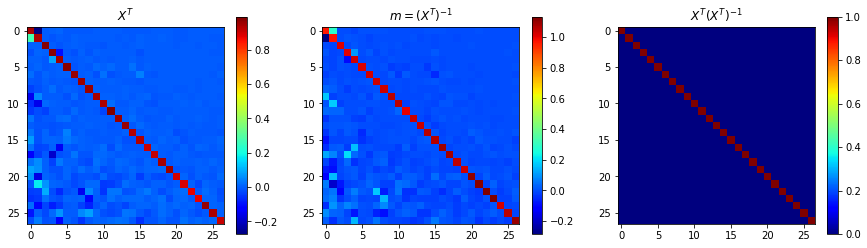

In [6]:
#check to make sure the matrix inversion is good
fig, ax = plt.subplots(1,3, figsize=(15,4))
img=ax[0].imshow(X.transpose())
fig.colorbar(img, ax=ax[0])
ax[0].set_title('$X^T$')
img=ax[1].imshow((m))
fig.colorbar(img, ax=ax[1])
ax[1].set_title('$m = (X^T)^{-1}$')
img=ax[2].imshow(X.transpose().dot(m))
fig.colorbar(img, ax=ax[2])
ax[2].set_title('$X^T (X^T)^{-1}$')

In [7]:
X[:,0:2]

array([[ 9.4854e-01,  2.7844e-01],
       [-2.7332e-01,  9.4379e-01],
       [ 1.6570e-03,  2.2408e-03],
       [ 4.9009e-03, -1.0517e-02],
       [ 9.1535e-03,  1.1743e-03],
       [-4.3142e-03, -2.0909e-03],
       [-5.8387e-03,  7.9174e-03],
       [-4.9232e-03,  7.9667e-04],
       [-3.4962e-03,  2.3435e-04],
       [-1.5290e-04, -1.9198e-04],
       [ 4.6142e-04,  2.3216e-03],
       [ 1.6086e-03,  3.1337e-03],
       [ 2.5050e-03, -4.2098e-03],
       [-3.2011e-03,  3.3100e-03],
       [-4.8257e-03, -3.0334e-03],
       [-5.2033e-03,  7.3174e-03],
       [-3.2334e-03,  6.5027e-05],
       [ 2.0056e-04,  1.3496e-03],
       [ 4.9938e-04,  3.8275e-03],
       [ 2.0210e-03, -8.4799e-04],
       [-1.4256e-03, -1.7304e-03],
       [-2.8326e-03, -1.4435e-03],
       [ 1.9212e-04,  4.7470e-04],
       [ 5.5642e-05, -2.2873e-04],
       [ 9.4020e-04, -4.7906e-04],
       [ 1.5374e-03, -1.4873e-03],
       [-6.9219e-04, -1.1785e-03]])

In [8]:
m[0, :]

array([ 9.71122596e-01,  2.81116430e-01, -2.65928799e-03, -1.24567730e-03,
       -9.02311688e-03,  4.51534107e-03,  3.78156393e-03,  4.84013770e-03,
        3.40065219e-03,  1.89610811e-04, -1.35473668e-03, -2.26244378e-03,
       -1.22451555e-03,  2.22912383e-03,  5.95413035e-03,  3.21492206e-03,
        3.43552262e-03, -5.78137940e-04, -1.62621564e-03, -1.75987903e-03,
        2.17142276e-03,  3.61917424e-03, -3.12040475e-04,  4.77105905e-05,
       -8.40363698e-04, -1.11718901e-03,  1.10032871e-03])

### Interpretation of the above:
* The FE model is generally more flexible than real mirror, i.e., the actual deformation was smaller than FEA prediction
* To get FEA predicted shape, we would need to apply more forces, i.e., more of the diagonal elements of $m$ should be larger than 1. This agrees with the center plot above.

Mode 1 is a special case. Here is what happens
* When we put on the Vdn3norm[:, 0], the measured shape had 0.95$\times$Udn3norm[:,0] - 0.27$\times$Udn3norm[:,1]
* So we should put on 1.05$\times$Vdn3norm[:,0] to get Udn3norm[:,0]. But that then comes with -0.27$\times$Udn3norm[:,1]. 
* So we want to add 0.27$\times$Vdn3norm[:,1] to cancel that. But that 0.27$\times$Vdn3norm[:,1] will come with 0.27$\times$0.28$\times$Vdn3norm[:,0]. 0.27$\times$0.28 = 0.076. 
* So we shouldn't have added 1.05$\times$Vdn3norm[:,0] in the first place. We should reduce that to make room for the 0.076$\times$Vdn3norm[:,1]. 1.05-0.076 = 0.974. We see above m[0,0]=0.971. Close enough!



In [18]:
aa = np.hstack([nodeID, bx, by, Udn3norm])
np.savetxt('data/M1M3_1um_156_grid.txt', aa, fmt = '%.6e')

In [26]:
f = Vdn3norm.copy() # we will leave forces for mode 28 and up untouched.
f[:, :27] = 0
for i in range(27):
    for j in range(27):
        f[:,i] = f[:, i]+m[i,j]*Vdn3norm[:,j]

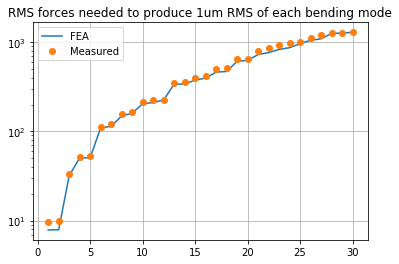

In [73]:
#check that we didn't seriously mess up
plt.semilogy(range(1,31), np.std(Vdn3norm[:,:30], axis=0), label='FEA')
plt.semilogy(range(1,31), np.std(f[:,:30], axis=0),'o', label='Measured')
plt.title('RMS forces needed to produce 1um RMS of each bending mode')
plt.grid()
plt.legend()

In [71]:
aa = np.hstack([actID.reshape(-1,1), xact.reshape(-1,1), yact.reshape(-1,1), f])
np.savetxt('data/M1M3_1um_156_force.txt', aa, fmt = '%.6e')

### check the orientation of the astigmatisms, forces vs. shape, both LSST and Mirror Lab modes

/Processed/190213_4-6 (Labeled as 3-7)/Combined/Combined M1M3 Map Mode number-1.h5: date not in h5 file. 
/Processed/190213_4-6 (Labeled as 3-7)/Combined/Combined M1M3 Map Mode number-1.h5: date not in h5 file. 


Text(0.5, 1.0, 'Measured forces')

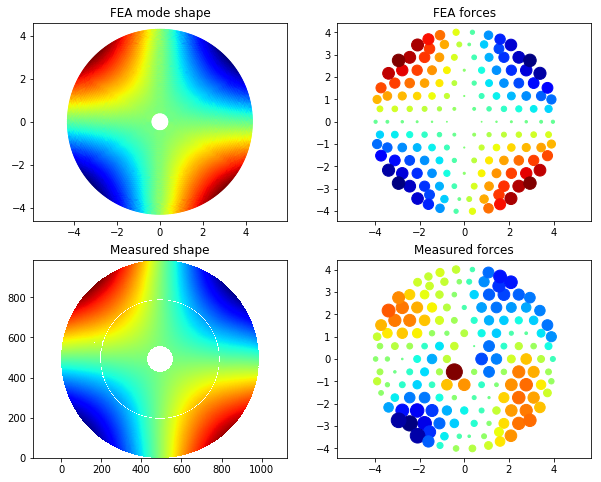

In [111]:
#get the measured mode shape
dateID = 190213
testID = '4-6'
testID1 = '3-7'
modeID = 1
iter = ' (Labeled as 3-7)'
fileset = sorted(glob.glob('%s/Processed/%d_%s%s/Combined/Combined*-%d.h5'%(
    dataDir, dateID, testID, iter, modeID)))
m1s,centerRow1,centerCol1,pixelSize1 = readH5Map(fileset, '/M1Data')
m3s,centerRow3,centerCol3,pixelSize3 = readH5Map(fileset, '/M3Data')
[x1, y1] = mkXYGrid(m1s, centerRow1, centerCol1, pixelSize1)
[x3, y3] = mkXYGrid(m3s, centerRow3, centerCol3, pixelSize3)
s = mkM1M3disp(m1s, m3s, x1, y1, x3, y3)
    
fig, ax = plt.subplots(2,2, figsize=(10,8))
img = ax[0][0].scatter(np.squeeze(bx), np.squeeze(by), c=-Udn3norm[:,0])
img = ax[0][1].scatter(xact, yact, abs(Vdn3norm[:,0])*10, -Vdn3norm[:,0])
img = ax[1][0].imshow(s, origin='lower')
img = ax[1][1].scatter(xact, yact, abs(f[:,0])*10, -f[:,0])
ax[0][0].axis('equal')
ax[0][1].axis('equal')
ax[1][0].axis('equal')
ax[1][1].axis('equal')
ax[0][0].set_title('FEA mode shape')
ax[0][1].set_title('FEA forces')
ax[1][0].set_title('Measured shape')
ax[1][1].set_title('Measured forces')

## The measured shape is not rotated relative to the FEA shape. Mirror Lab has been fitting their bending modes to measured LSST shapes. Problem reported to Mirror Lab on 5/3/19.